## Import Essentials

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
df= pd.read_csv('diamonds.csv')

## Data Overview

In [3]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

### Dropping `Unnamed: 0` column because we don`t need it

In [76]:
df.drop('Unnamed: 0',axis=1, inplace=True)

## EDA

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [35]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

### Missing Values

In [4]:
print("Total Missing Values: ",df.isna().sum().sum())
print("Missing Values By Column: \n",df.isna().sum())

Total Missing Values:  0
Missing Values By Column: 
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Duplicates

In [77]:
df.duplicated().sum()

np.int64(146)

In [78]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Outliers

In [79]:
# Loop through each numerical column and detect outliers
outliers = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    # Calculate the quartiles and IQR for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each column
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # If there are any outliers, append them to the outliers DataFrame
    if not col_outliers.empty:
        outliers = pd.concat([outliers, col_outliers])

# Show the outliers found
outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8632 entries, 12246 to 51506
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    8632 non-null   float64
 1   cut      8632 non-null   object 
 2   color    8632 non-null   object 
 3   clarity  8632 non-null   object 
 4   depth    8632 non-null   float64
 5   table    8632 non-null   float64
 6   price    8632 non-null   int64  
 7   x        8632 non-null   float64
 8   y        8632 non-null   float64
 9   z        8632 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 741.8+ KB


## Visualization

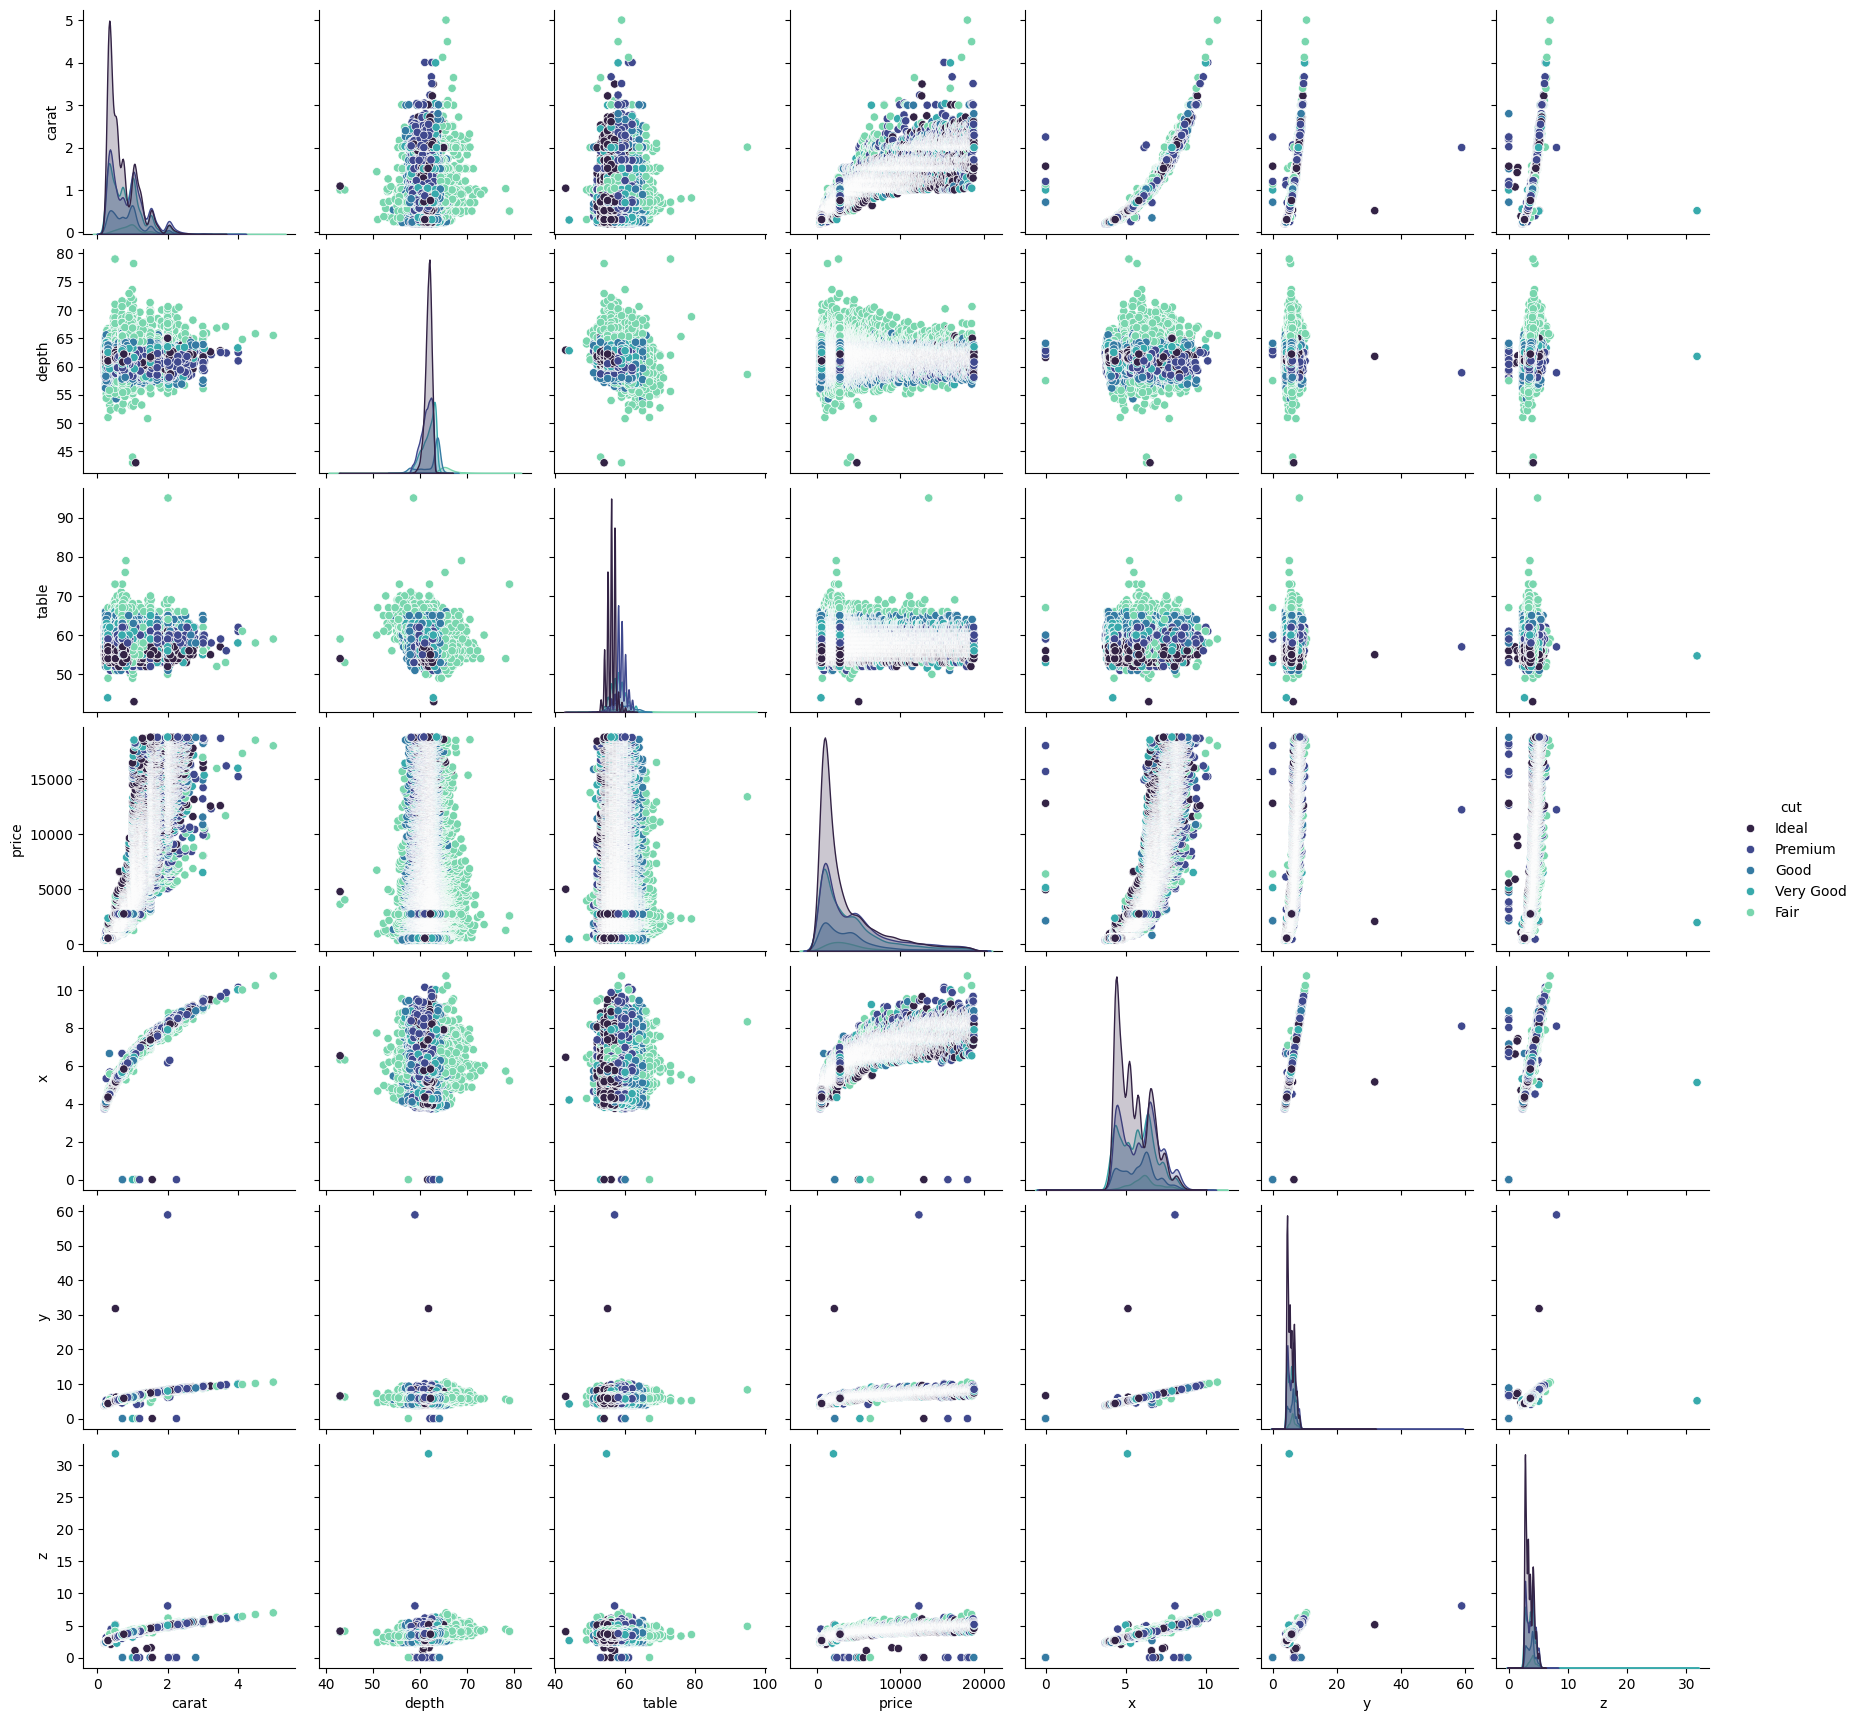

In [25]:
#pair plot
sns.pairplot(df, hue='cut',palette="mako")
plt.show()

In [80]:
# Dropping outliers
df_cleaned = df.drop(outliers.index)

df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47416 entries, 0 to 47415
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47416 non-null  float64
 1   cut      47416 non-null  object 
 2   color    47416 non-null  object 
 3   clarity  47416 non-null  object 
 4   depth    47416 non-null  float64
 5   table    47416 non-null  float64
 6   price    47416 non-null  int64  
 7   x        47416 non-null  float64
 8   y        47416 non-null  float64
 9   z        47416 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [65]:
df_cleaned.describe()


carat         depth         table         price             x  \
count  47416.000000  47416.000000  47416.000000  47416.000000  47416.000000   
mean       0.708950     61.785908     57.261517   3112.258984      5.547416   
std        0.371023      1.106205      2.021723   2751.212081      0.979717   
min        0.200000     58.800000     52.000000    326.000000      3.730000   
25%        0.380000     61.100000     56.000000    891.000000      4.640000   
50%        0.600000     61.900000     57.000000   2064.000000      5.440000   
75%        1.010000     62.500000     59.000000   4637.000000      6.410000   
max        2.000000     64.700000     63.500000  11888.000000      8.280000   

                  y             z  
count  47416.000000  47416.000000  
mean       5.552283      3.428830  
std        0.973817      0.606057  
min        3.680000      1.410000  
25%        4.650000      2.860000  
50%        5.460000      3.360000  
75%        6.410000      3.980000  
max        8.270000      5.300000

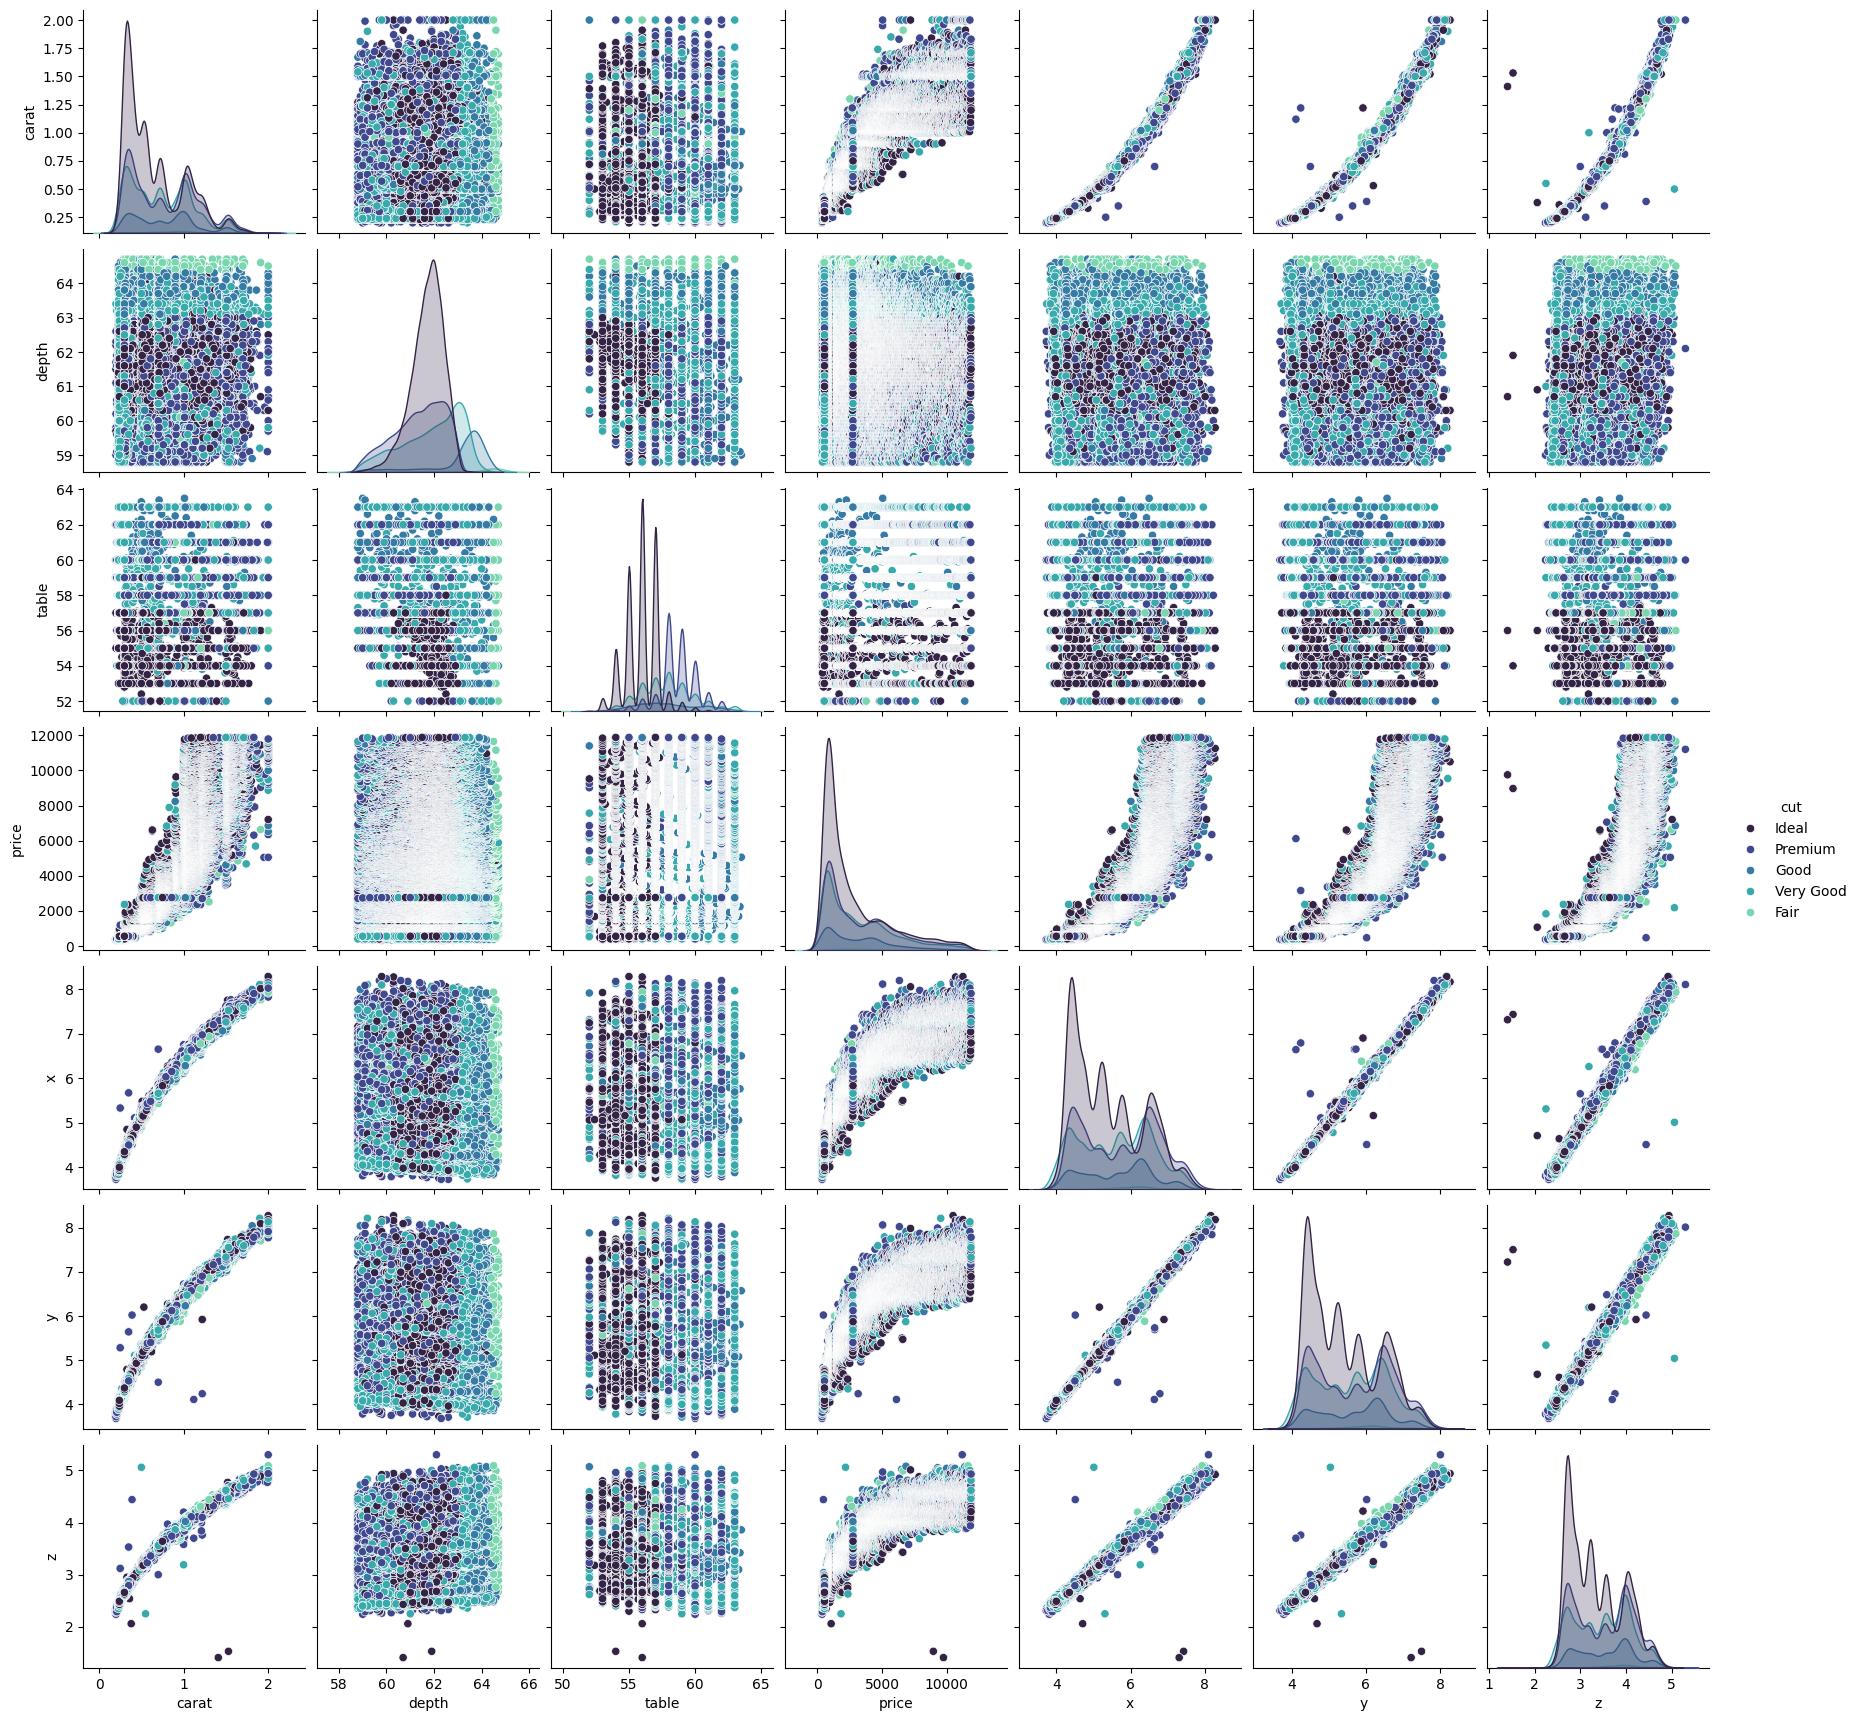

In [52]:
sns.pairplot(df_cleaned, hue='cut', palette='mako')
plt.show()

In [81]:
cat = df_cleaned.select_dtypes(include=['object']).columns
print(cat)

Index(['cut', 'color', 'clarity'], dtype='object')


C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\1993760630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='mako')


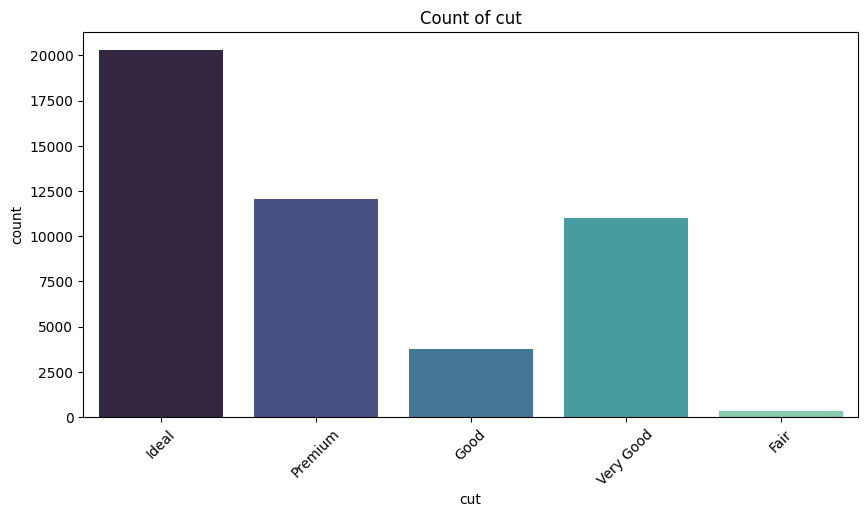

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\1993760630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='mako')


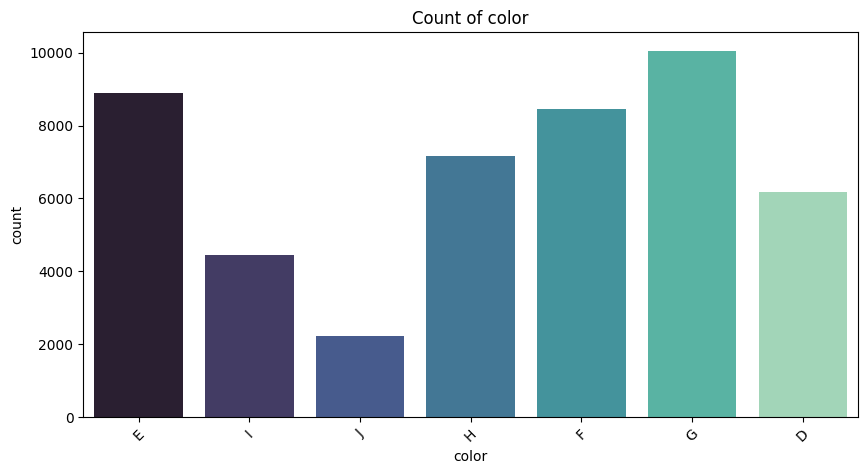

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\1993760630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='mako')


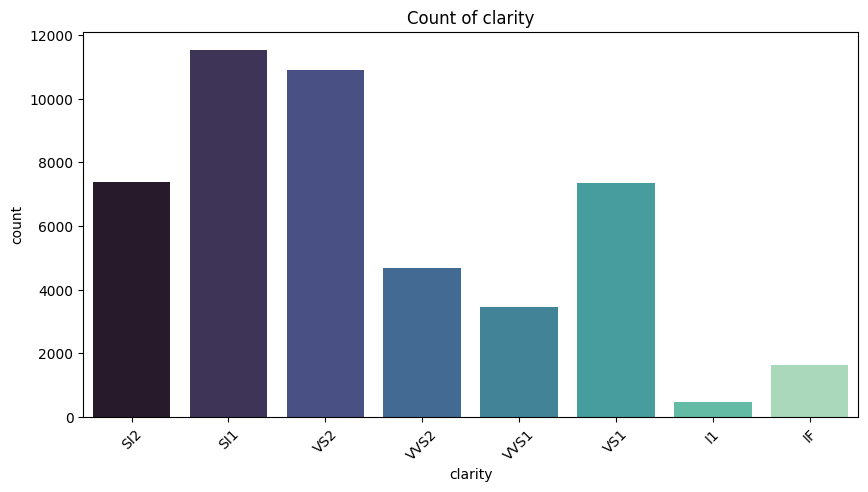

In [86]:
# Categorical features
for col in cat:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=col, palette='mako')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\23721091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x= col, y='price', palette="Blues")


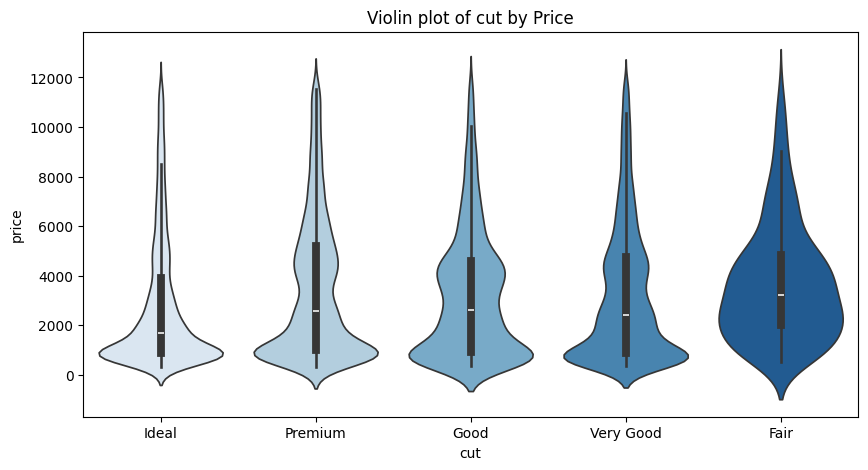

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\23721091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x= col, y='price', palette="Blues")


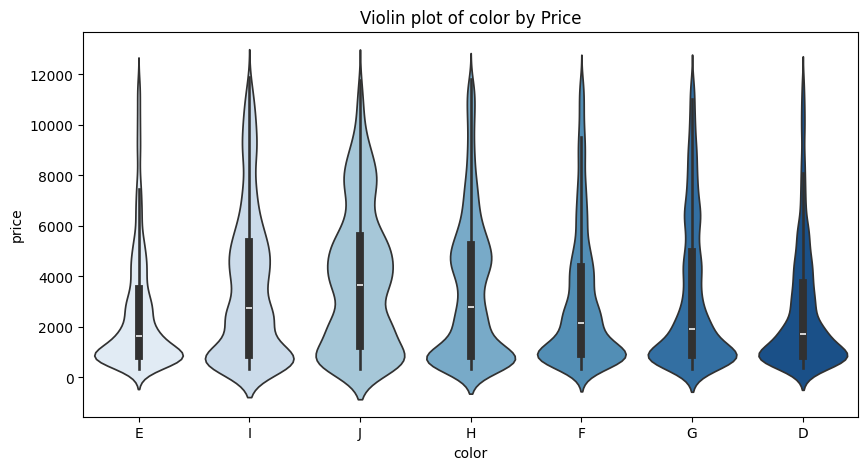

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\23721091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x= col, y='price', palette="Blues")


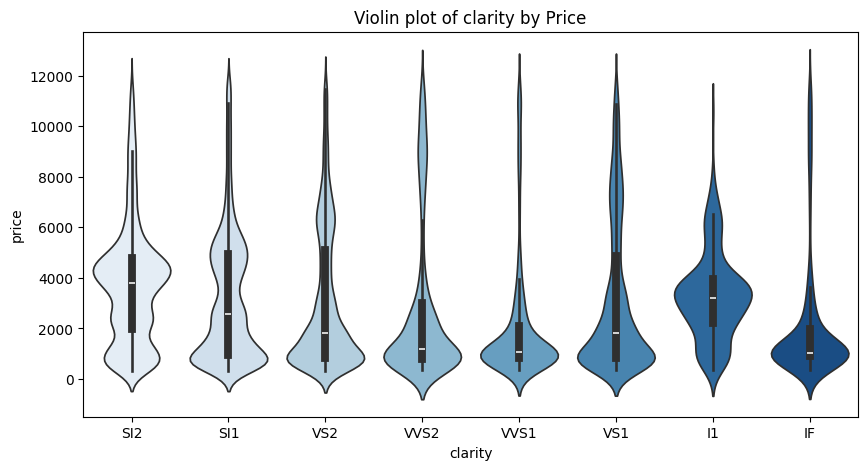

In [106]:
# Violin plots
for col in cat:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=df_cleaned, x= col, y='price', palette="Blues")
    plt.title(f'Violin plot of {col} by Price')
    plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\2004675692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")


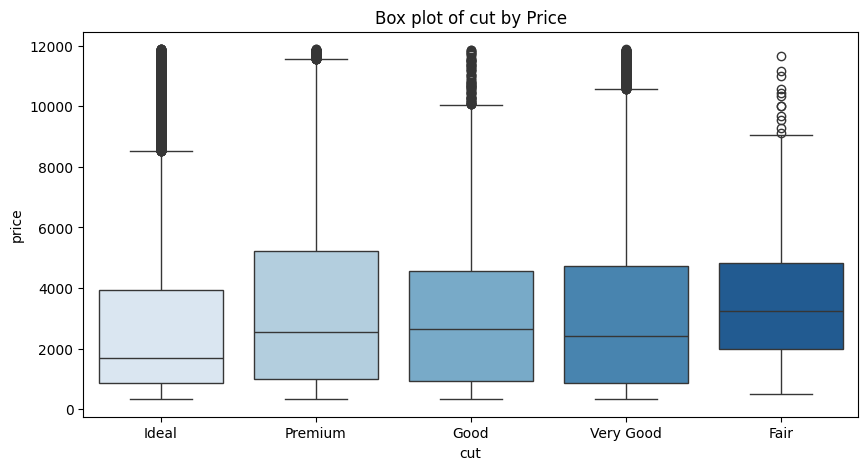

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\2004675692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")


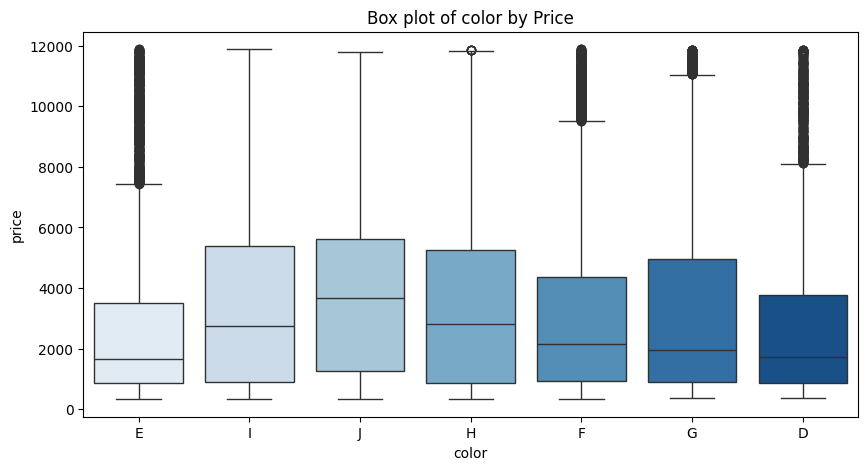

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10472\2004675692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")


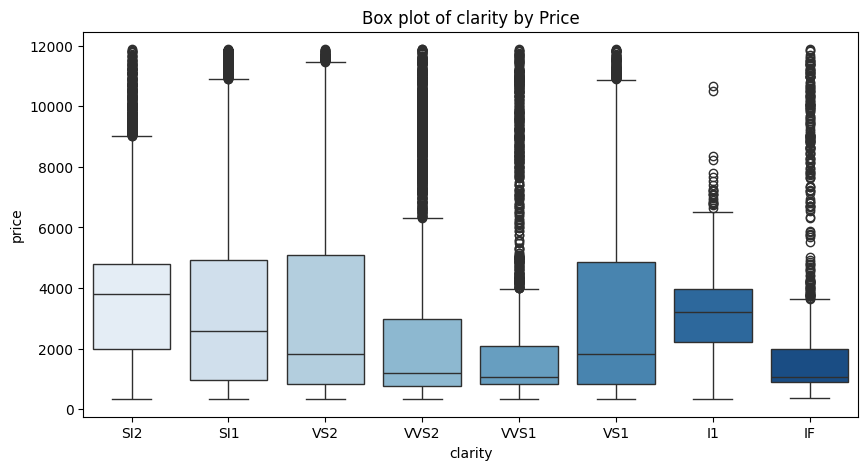

In [107]:
# Box plots
for col in cat:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x= col, y='price', palette="Blues")
    plt.title(f'Box plot of {col} by Price')
    plt.show()


In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [11]:
labeled_df = df_cleaned.copy()
for col in cat:
    labeled_df[col] = le.fit_transform(labeled_df[col])
labeled_df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
3   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
4   0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48

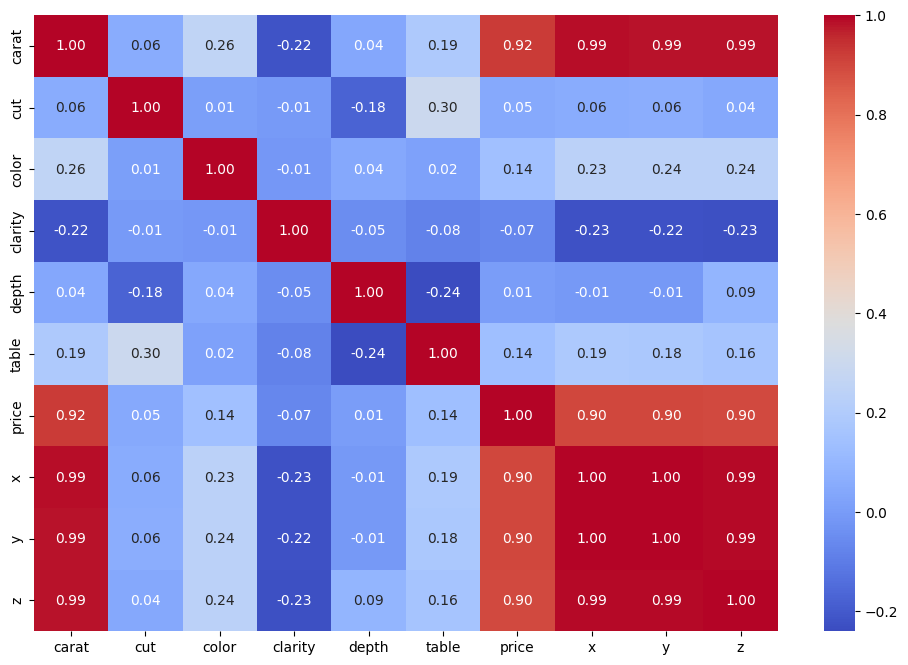

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = labeled_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Data Preprocessing

In [82]:
#SSplitting the data
from sklearn.model_selection import train_test_split

X = labeled_df.drop(columns=['price'],axis=1)
y = labeled_df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [13]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [14]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


### Linear Regression

In [ ]:

model = LinearRegression() 

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Accuracy Training
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")
# Accuracy Testing
test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")


y_pred = model.predict(X_test)
train_pred = model.predict(X_train)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)


Training Accuracy: 0.89
Testing Accuracy: 0.89


In [ ]:
print(f"R2 :{r2 :.4f}")
print(f"mae :{mae :.4f}")
print(f"mse :{mse :.4f}")
print(f"rmse :{rmse :.4f}")
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean():.4f}")

Training R2: 0.89
R2 :0.8903
mae :613.3723
mse :835400.3880
rmse :914.0024
Cross-validation scores: [0.89000269 0.89179422 0.89014676 0.89031242 0.88665725]
Mean cross-validation score: 0.8898


### Ridge

In [25]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)




Ridge()

In [26]:
#Training Accuracy
train_accuracy_ridge = ridge_model.score(X_train, y_train)
print(f"Training Accuracy (Ridge): {train_accuracy_ridge:.2f}")
#Testing Accuracy
test_accuracy_ridge = ridge_model.score(X_test, y_test)


Training Accuracy (Ridge): 0.89


In [ ]:
#Metrics
y_pred_ridge = ridge_model.predict(X_test)
train_pred_ridge = ridge_model.predict(X_train)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
cross_val_scores_ridge = cross_val_score(ridge_model, X_train, y_train, cv=5)



Testing Accuracy (Ridge): 0.89


In [29]:
print(f"R2 (Ridge): {r2_ridge:.4f}")
print(f"mae (Ridge): {mae_ridge:.4f}")
print(f"mse (Ridge): {mse_ridge:.4f}")
print(f"rmse (Ridge): {rmse_ridge:.4f}")
print(f"Testing Accuracy (Ridge): {test_accuracy_ridge:.2f}")
print(f"Cross-validation scores (Ridge): {cross_val_scores_ridge}")
print(f"Mean cross-validation score (Ridge): {cross_val_scores_ridge.mean():.4f}")



R2 (Ridge): 0.8903
mae (Ridge): 613.3359
mse (Ridge): 835386.3755
rmse (Ridge): 913.9947
Testing Accuracy (Ridge): 0.89
Cross-validation scores (Ridge): [0.88999877 0.89178744 0.890151   0.89030344 0.88669853]
Mean cross-validation score (Ridge): 0.8898


### Lasso

In [99]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.910e+09, tolerance: 2.867e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [100]:
train_accuracy_lasso = lasso_model.score(X_train, y_train)

test_accuracy_lasso = lasso_model.score(X_test, y_test)


y_pred_lasso = lasso_model.predict(X_test)
train_pred_lasso = lasso_model.predict(X_train)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
cross_val_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5)

C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.995e+09, tolerance: 2.294e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.380e+09, tolerance: 2.309e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

In [101]:
print(f"Training Accuracy (Lasso): {train_accuracy_lasso:.2f}")
print(f"r2 (Lasso): {r2_lasso:.4f}")
print(f"mae (Lasso): {mae_lasso:.4f}")
print(f"mse (Lasso): {mse_lasso:.4f}")
print(f"rmse (Lasso): {rmse_lasso:.4f}")
print(f"Cross-validation scores (Lasso): {cross_val_scores_lasso}")
print(f"Mean cross-validation score (Lasso): {cross_val_scores_lasso.mean():.4f}")

Training Accuracy (Lasso): 0.89
r2 (Lasso): 0.8903
mae (Lasso): 612.8875
mse (Lasso): 835380.2035
rmse (Lasso): 913.9914
Cross-validation scores (Lasso): [0.88998814 0.89177495 0.89013426 0.89028256 0.8867924 ]
Mean cross-validation score (Lasso): 0.8898


### Polynomial Regression

In [39]:

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [40]:
#Predicting
y_pred_poly = polyreg.predict(X_test)
train_pred_poly = polyreg.predict(X_train)
#Metrics
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
cross_val_scores_poly = cross_val_score(polyreg, X_train, y_train, cv=5)

In [44]:
train_accuracy_poly = polyreg.score(X_train, y_train)
print(f"Training Accuracy (Polynomial Regression): {train_accuracy_poly:.2f}")
print(f"R2 (Polynomial Regression): {r2_poly:.4f}")
print(f"mae (Polynomial Regression): {mae_poly:.4f}")
print(f"mse (Polynomial Regression): {mse_poly:.4f}")
print(f"rmse (Polynomial Regression): {rmse_poly:.4f}")
print(f"Cross-validation scores (Polynomial Regression): {cross_val_scores_poly}")
print(f"Mean cross-validation score (Polynomial Regression): {cross_val_scores_poly.mean():.4f}")

Training Accuracy (Polynomial Regression): 0.93
R2 (Polynomial Regression): 0.9312
mae (Polynomial Regression): 443.5637
mse (Polynomial Regression): 523699.0900
rmse (Polynomial Regression): 723.6706
Cross-validation scores (Polynomial Regression): [0.92956779 0.93386779 0.93107265 0.93197763 0.93135013]
Mean cross-validation score (Polynomial Regression): 0.9316


### Random Forest

In [77]:
#Random Forest
rf_model = RandomForestRegressor(n_estimators=10,max_depth=13,min_samples_leaf=3,min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=10, random_state=42)

In [78]:
# Predicting
y_pred_rf = rf_model.predict(X_test)
train_pred_rf = rf_model.predict(X_train)
# Metrics
rf_R2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
cross_val_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)

In [82]:
print(f"Training Accuracy (RF): {rf_model.score(X_train, y_train)*100}")
print(f"\nR2 (RF): {rf_R2*100}")
print(f"mae (RF): {rf_mae}")
print(f"mse (RF): {rf_mse}")
print(f"rmse (RF): {rf_rmse}")
print(f"Cross-validation scores (RF): {cross_val_scores_rf}")
print(f"Mean cross-validation score (RF): {cross_val_scores_rf.mean()}")

Training Accuracy (RF): 98.98099545584319

R2 (RF): 98.20679376236555
mae (RF): 206.6261512705741
mse (RF): 136504.78508156174
rmse (RF): 369.4655397754461
Cross-validation scores (RF): [0.98029307 0.98224078 0.98027517 0.98192674 0.97983357]
Mean cross-validation score (RF): 0.9809138667124546


In [ ]:
param_grid = {
    'n_estimators': [10, 13, 30],
    'max_depth': [9, 12, 13],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [87]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=13, min_samples_leaf=3,
                                             min_samples_split=5,
                                             n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [9, 12, 13], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 13, 30]},
             verbose=2)

In [ ]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_rf_model = grid_search.best_estimator_
print(f"\nBest RF Model: {best_rf_model}")

Best Parameters: {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}


In [91]:
# Predicting with the best model
y_pred_best_rf = best_rf_model.predict(X_test)
train_pred_best_rf = best_rf_model.predict(X_train)
# Metrics
rf_R2_best = r2_score(y_test, y_pred_best_rf)
rf_mse_best = mean_squared_error(y_test, y_pred_best_rf)
rf_mae_best = mean_absolute_error(y_test, y_pred_best_rf)
rf_rmse_best = np.sqrt(rf_mse_best)
cross_val_scores_rf_best = cross_val_score(best_rf_model, X_train, y_train, cv=5)

In [92]:
print(f"Training Accuracy (Best RF): {best_rf_model.score(X_train, y_train)*100}")
print(f"\nR2 (Best RF): {rf_R2_best*100}")
print(f"mae (Best RF): {rf_mae_best}")
print(f"mse (Best RF): {rf_mse_best}")
print(f"rmse (Best RF): {rf_rmse_best}")
print(f"Cross-validation scores (Best RF): {cross_val_scores_rf_best}")
print(f"Mean cross-validation score (Best RF): {cross_val_scores_rf_best.mean()}")


Training Accuracy (Best RF): 99.14242725481421

R2 (Best RF): 98.2526681193671
mae (Best RF): 203.6582901358206
mse (Best RF): 133012.67741885816
rmse (Best RF): 364.70903117260224
Cross-validation scores (Best RF): [0.98114488 0.98282421 0.9810505  0.9826461  0.98060456]
Mean cross-validation score (Best RF): 0.9816540508459308


### XGBoost

In [37]:
# XGBoost

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
# Predicting
y_pred_xgb = xgb_model.predict(X_test)
train_pred_xgb = xgb_model.predict(X_train)
# Metrics
xgb_R2 = r2_score(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
cross_val_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)


In [39]:
print("Training Accuracy (XGBoost): ", xgb_model.score(X_train, y_train)*100)
print(f"\nR2 (XGBoost): {xgb_R2*100}")
print(f"mae (XGBoost): {xgb_mae}")
print(f"mse (XGBoost): {xgb_mse}")
print(f"rmse (XGBoost): {xgb_rmse}")
print(f"Cross-validation scores (XGBoost): {cross_val_scores_xgb}")
print(f"Mean cross-validation score (XGBoost): {cross_val_scores_xgb.mean()}")

Training Accuracy (XGBoost):  98.7051784992218

R2 (XGBoost): 98.31511974334717
mae (XGBoost): 203.9463348388672
mse (XGBoost): 128258.453125
rmse (XGBoost): 358.13189347641185
Cross-validation scores (XGBoost): [0.98242772 0.98409033 0.98282504 0.9839927  0.98271871]
Mean cross-validation score (XGBoost): 0.9832108974456787


In [87]:
df_cleaned.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [88]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [65]:
# Exporting the model
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [90]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns.drop('price')
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

In [91]:
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)


In [92]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', model)
])


In [93]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  Index(['cut', 'color', 'clarity'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_byt...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [94]:
joblib.dump(pipeline, 'DiamondPrediction.pkl')

['DiamondPrediction.pkl']

In [95]:
pipe_pred = pipeline.predict(X_test)


In [96]:
r2_pipe = r2_score(y_test, pipe_pred)
mse_pipe = mean_squared_error(y_test, pipe_pred)
mae_pipe = mean_absolute_error(y_test, pipe_pred)
rmse_pipe = np.sqrt(mse_pipe)
cross_val_scores_pipe = cross_val_score(pipeline, X_train, y_train, cv=5)


In [97]:
print(f"R2 (Pipeline): {r2_pipe:.4f}")
print(f"mae (Pipeline): {mae_pipe:.4f}")
print(f"mse (Pipeline): {mse_pipe:.4f}")
print(f"rmse (Pipeline): {rmse_pipe:.4f}")
print(f"Cross-validation scores (Pipeline): {cross_val_scores_pipe}")
print(f"Mean cross-validation score (Pipeline): {cross_val_scores_pipe.mean():.4f}")

R2 (Pipeline): 0.9831
mae (Pipeline): 203.9820
mse (Pipeline): 128289.7266
rmse (Pipeline): 358.1756
Cross-validation scores (Pipeline): [0.98243457 0.98410976 0.98280531 0.98400372 0.9827159 ]
Mean cross-validation score (Pipeline): 0.9832
